In [1]:
import pandas as pd
import numpy as np
import os
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Dataset:

In [2]:
DATA_path= 'https://raw.githubusercontent.com/RodrigoAcev/OBESITY_LEVELS/master/data/ObesityDataSet_raw_and_data_sinthetic.csv'

In [3]:
df = pd.read_csv(DATA_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Transformación variables categóricas:

In [4]:
#Nombre de columnas con datos categoricos y numericos:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
            'SCC', 'CALC', 'MTRANS']

num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [5]:
#Diccionario con clases 
class_dict = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6}

inv_class = dict((v_i,k_i) for k_i, v_i in class_dict.items())
#inv_class

df['NObeyesdad'] = df['NObeyesdad'].apply(lambda x: class_dict[x])

In [6]:
#Diccionario para transformacion de variables categoricas a numericas:
attr_dic = {'yes':1,
            'no':0,
            'Sometimes':1,
            'Frequently':2,
            'Always':3,
            'Male':0,
            'Female':1,
            'Walking':0,
            'Bike':1,
            'Public_Transportation':2,
            'Motorbike':3,
            'Automobile':4
           }

In [7]:
df.replace(attr_dic, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

## Train & Test Split

In [8]:
X = df.drop('NObeyesdad', axis=1).copy()
y = df['NObeyesdad'].copy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((1688, 16), (423, 16))

## Normalización de datos

In [10]:
from sklearn.preprocessing import StandardScaler

#Normalizacion datos categoricos:
scaler_cat = StandardScaler()
X_train.loc[:,cat_cols] = scaler_cat.fit_transform(X_train.loc[:,cat_cols].values)

#Normalizacion datos numericos:
scaler_num = StandardScaler()
X_train.loc[:,num_cols] = scaler_num.fit_transform(X_train.loc[:,num_cols].values)
X_train.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03
mean,4.735548e-18,1.309017e-16,-4.535603e-16,-5.187399e-16,4.944044e-16,-1.580489e-16,-4.338289e-16,6.387729e-16,-1.075035e-16,5.557692e-18,1.937875e-16,-1.526557e-16,-3.848620e-16,1.514060e-16,-3.543769e-16,-1.705126e-16
std,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00
min,-9.976331e-01,-1.474967e+00,-2.692580e+00,-1.819299e+00,-2.129419e+00,-2.759030e+00,-2.659811e+00,-2.150047e+00,-2.423677e+00,-1.455116e-01,-1.655005e+00,-2.215825e-01,-1.185094e+00,-1.069742e+00,-1.397473e+00,-2.603713e+00
25%,-9.976331e-01,-6.919806e-01,-7.709508e-01,-7.810441e-01,4.696116e-01,3.624463e-01,-7.811726e-01,-4.719466e-02,-2.917506e-01,-1.455116e-01,-6.591605e-01,-2.215825e-01,-1.051606e+00,-1.069742e+00,-1.397473e+00,-4.263201e-01
50%,-9.976331e-01,-2.397809e-01,2.187898e-05,-1.430424e-01,4.696116e-01,3.624463e-01,-1.381681e-01,4.083130e-01,-2.917506e-01,-1.455116e-01,-1.485667e-02,-2.215825e-01,2.017320e-03,-5.807430e-02,5.219202e-01,-4.263201e-01
75%,1.002372e+00,2.676076e-01,7.057043e-01,7.961633e-01,4.696116e-01,3.624463e-01,1.097466e+00,4.083130e-01,-2.917506e-01,-1.455116e-01,7.710986e-01,-2.215825e-01,7.803043e-01,5.780955e-01,5.219202e-01,-4.263201e-01
max,1.002372e+00,5.812162e+00,3.015736e+00,3.028093e+00,4.696116e-01,3.624463e-01,1.097466e+00,1.687493e+00,3.972103e+00,6.872305e+00,1.625291e+00,4.512991e+00,2.376240e+00,2.225933e+00,4.360706e+00,1.751073e+00


In [11]:
#Guardar scalers:
if not(os.path.exists('./Scalers/')):
    os.mkdir('./Scalers/')

with open('./Scalers/scaler_cat.scaler', 'wb') as f:
    pk.dump(scaler_cat, f)

with open('./Scalers/scaler_num.scaler', 'wb') as f:
    pk.dump(scaler_num, f)

## PCA

In [12]:
from sklearn.decomposition import PCA

obs_pca = PCA().fit(X_train)
obs_pca.components_.shape

(16, 16)

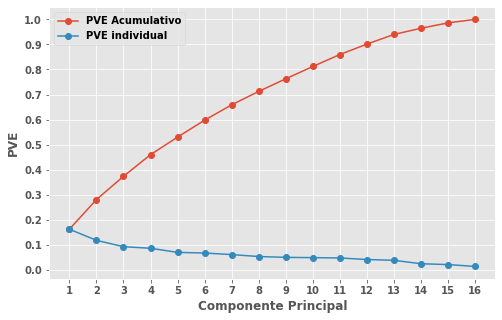

In [13]:
fig, axs = plt.subplots(figsize=(8,5))

pca_pve = obs_pca.explained_variance_ratio_
x_axis = np.arange(1, obs_pca.components_.shape[0]+1)

axs.plot(x_axis, np.cumsum(pca_pve), 'o-', label='PVE Acumulativo')
axs.plot(x_axis, pca_pve, 'o-', label='PVE individual')

axs.set_yticks(np.arange(0,1.1,.1))
axs.set_xticks(x_axis)
axs.set_ylabel('PVE')
axs.set_xlabel('Componente Principal')

plt.legend()
plt.show()

In [14]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
442,-0.997633,0.267608,0.215430,-0.819498,0.469612,0.362446,-0.781173,0.408313,-0.291751,-0.145512,-0.014857,-0.221583,-1.185094,0.578096,0.521920,-2.603713
253,1.002372,0.267608,-1.184723,-1.511668,0.469612,0.362446,-0.781173,-2.150047,-0.291751,-0.145512,-0.014857,-0.221583,-1.185094,2.225933,0.521920,-0.426320
554,-0.997633,-1.285160,-0.096836,-1.295197,-2.129419,0.362446,-0.781173,-0.869606,-0.291751,-0.145512,1.090332,-0.221583,-0.006352,-0.287289,0.521920,-0.426320
1500,-0.997633,0.026979,-0.417041,0.170496,0.469612,0.362446,-1.320627,0.408313,-0.291751,-0.145512,-1.389050,-0.221583,-0.640232,0.389471,-1.397473,1.751073
359,1.002372,1.376519,-1.507835,-1.473214,0.469612,-2.759030,-0.781173,0.408313,-0.291751,-0.145512,-0.014857,-0.221583,0.002017,-1.069742,0.521920,-0.426320


In [15]:
pd.DataFrame(obs_pca.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.044756,0.931898,-0.647872,-1.461541,0.771175,0.403271,-0.159807,-0.535154,-0.428420,1.370138,0.270355,-0.203266,0.023423,0.276096,2.076397,-0.894830
1,1.515010,-1.002006,-0.896119,-2.513083,0.584905,0.796780,1.070197,0.889552,-0.458331,-0.795196,0.855268,1.135727,-0.289009,-0.314869,0.637485,-0.731157
2,1.073595,1.225528,0.521122,-1.111005,-0.260766,1.828603,-1.368693,-0.276429,-0.479369,-0.856968,0.329954,-0.845552,0.860266,-0.384113,0.068074,0.211669
3,-0.523199,-1.003478,1.782459,-1.529944,0.108863,-1.084376,0.346453,0.568763,0.403732,0.879879,-0.573756,-0.014428,0.356966,-0.293053,-0.596919,0.928034
4,1.765217,-1.307075,0.611467,0.958090,-0.899750,0.488857,0.002086,-0.592849,-2.060441,1.222090,-0.601282,1.218511,-1.222910,-0.036016,0.861142,-0.606174


In [16]:
#Guardar modelo de PCA:
if not(os.path.exists('./Modelos/')):
    os.mkdir('./Modelos/')

with open('./Modelos/pca_model.pk', 'wb') as f:
    pk.dump(obs_pca, f)

In [17]:
#usar los 16 componentes principales para primera iteracion:
X_train = obs_pca.transform(X_train)
X_train.shape

(1688, 16)

## Multinomial Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

params_dict = {'multi_class': ['multinomial'],
               'penalty': ['l1', 'l2', 'elasticnet'],
               'C': np.arange(0.1,101,.1),
               'class_weight': ['balanced'],
               'solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
              }

model = LogisticRegression()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

12108

In [19]:
#Random search:
random_cv = RandomizedSearchCV(LogisticRegression(), 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=120,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'class_weight': 'balanced',
 'C': 88.0}

In [20]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

0.9757109004739336

In [21]:
params_dict = {'multi_class': ['multinomial'],
               'penalty': ['l2'],
               'C': np.arange(50,91,5),
               'class_weight': ['balanced'],
               'solver' : ['lbfgs']
              }
combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

9

In [22]:
#GridSearch:
model = LogisticRegression()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([50, 55, 60, 65, 70, 75, 80, 85, 90]),
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1_macro', verbose=2)

In [23]:
grid_cv.best_params_, grid_cv.best_score_

({'C': 70,
  'class_weight': 'balanced',
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'lbfgs'},
 0.9523066273157268)

In [24]:
lgr_model = LogisticRegression(**grid_cv.best_params_, random_state=42)
lgr_model.fit(X_train, y_train)

LogisticRegression(C=70, class_weight='balanced', multi_class='multinomial',
                   random_state=42)

In [25]:
f1_score(y_train, lgr_model.predict(X_train), average='macro')

0.9742305542414001

In [26]:
#Preparar datos de prueba:
X_test.loc[:, cat_cols] = scaler_cat.transform(X_test.loc[:,cat_cols].values)
X_test.loc[:, num_cols] = scaler_num.transform(X_test.loc[:,num_cols].values)

X_test = obs_pca.transform(X_test)
X_test.shape

(423, 16)

In [27]:
y_hat = lgr_model.predict(X_test)
f1_score(y_test, y_hat, average='macro')

0.9443603334698233

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.93      0.90      0.91        58
 Overweight_Level_I       0.93      0.86      0.89        58
Overweight_Level_II       0.92      0.93      0.92        58
     Obesity_Type_I       0.94      0.97      0.96        70
    Obesity_Type_II       0.95      0.98      0.97        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.95       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



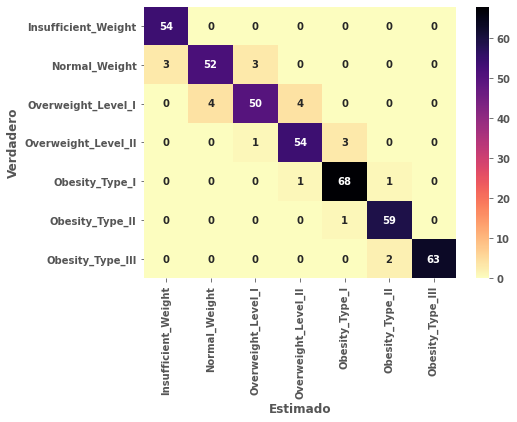

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def GraficaCM(y_test, y_hat, class_dict):

    labels_classes = list(class_dict.keys())
    
    cm = confusion_matrix(y_test, y_hat)

    print(classification_report(y_test, y_hat, target_names=labels_classes))

    fig, axs = plt.subplots(figsize=(7,5))

    sns.heatmap(cm, annot=True, ax=axs, cmap='magma_r')

    axs.set_yticks(np.arange(len(labels_classes))+.5)
    axs.set_xticks(np.arange(len(labels_classes))+.5)

    axs.set_xticklabels(labels_classes, rotation=90)
    axs.set_yticklabels(labels_classes, rotation=0)

    axs.set_ylabel('Verdadero')
    axs.set_xlabel('Estimado')

    plt.show()
    
GraficaCM(y_test, y_hat, class_dict)

## SVM

In [29]:
from sklearn.svm import SVC

params_dict = {'kernel':[ 'sigmoid', 'rbf', 'poly'],
               'C': np.arange(0.1,101,.1),
               'class_weight': ['balanced'],
               'probability' : [True]
              }

model = SVC()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

3027

In [30]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=20,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'probability': True, 'kernel': 'rbf', 'class_weight': 'balanced', 'C': 43.2}

In [31]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [32]:
params_dict = {'kernel':['rbf'],
               'C': np.arange(40,51,1),
               'class_weight': ['balanced'],
               'probability' : [True]
              }
combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

11

In [33]:
#GridSearch:
model = SVC()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'class_weight': ['balanced'], 'kernel': ['rbf'],
                         'probability': [True]},
             scoring='f1_macro', verbose=2)

In [34]:
grid_cv.best_params_, grid_cv.best_score_

({'C': 41, 'class_weight': 'balanced', 'kernel': 'rbf', 'probability': True},
 0.9135875282287875)

In [35]:
svm_model = SVC(**grid_cv.best_params_)
svm_model.fit(X_train, y_train)

SVC(C=41, class_weight='balanced', probability=True)

In [36]:
y_hat_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_hat_svm, average='macro')
f1_svm

0.9135414863374123

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94        54
      Normal_Weight       0.80      0.81      0.80        58
 Overweight_Level_I       0.86      0.84      0.85        58
Overweight_Level_II       0.90      0.95      0.92        58
     Obesity_Type_I       0.93      0.93      0.93        70
    Obesity_Type_II       0.98      0.95      0.97        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.91       423
          macro avg       0.91      0.91      0.91       423
       weighted avg       0.92      0.91      0.92       423



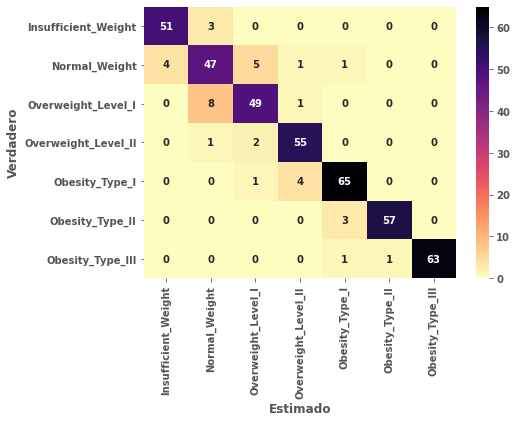

In [37]:
GraficaCM(y_test, y_hat_svm, class_dict)

## Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier

params_dict = {'max_depth':np.arange(3,16),
               'min_samples_split': np.arange(2,200,10),
               'class_weight': ['balanced'],
               'max_features' : list(np.arange(0.1,1.1,.1))+['sqrt']
              }

model = DecisionTreeClassifier()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

2860

In [39]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=20,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'min_samples_split': 22,
 'max_features': 0.9,
 'max_depth': 9,
 'class_weight': 'balanced'}

In [40]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

0.7938388625592417

In [41]:
params_dict = {'max_depth':np.arange(7,11),
               'min_samples_split': np.arange(20,26),
               'class_weight': ['balanced'],
               'max_features' : [1,0.9,'sqrt']
              }

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

72

In [42]:
#GridSearch:
model = DecisionTreeClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': array([ 7,  8,  9, 10]),
                         'max_features': [1, 0.9, 'sqrt'],
                         'min_samples_split': array([20, 21, 22, 23, 24, 25])},
             scoring='f1_macro', verbose=2)

In [43]:
grid_cv.best_params_, grid_cv.best_score_

({'class_weight': 'balanced',
  'max_depth': 10,
  'max_features': 0.9,
  'min_samples_split': 22},
 0.6953682714597237)

In [44]:
dt_model = DecisionTreeClassifier(**grid_cv.best_params_)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=0.9,
                       min_samples_split=22)

In [45]:
y_hat_dt = dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_hat_dt, average='macro')
f1_dt

0.7391999909105047

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.70      0.76        54
      Normal_Weight       0.58      0.55      0.57        58
 Overweight_Level_I       0.48      0.71      0.57        58
Overweight_Level_II       0.68      0.67      0.68        58
     Obesity_Type_I       0.78      0.67      0.72        70
    Obesity_Type_II       0.91      0.87      0.89        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.74       423
          macro avg       0.75      0.73      0.74       423
       weighted avg       0.76      0.74      0.74       423



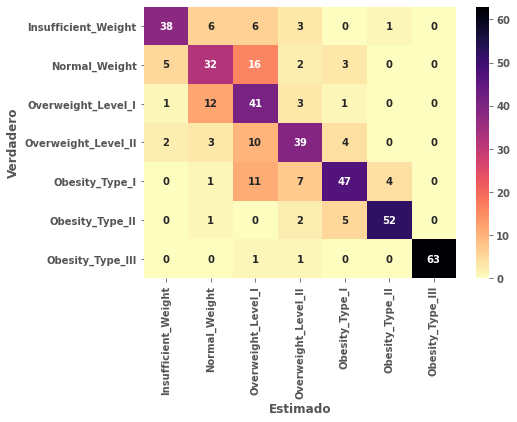

In [46]:
GraficaCM(y_test, y_hat_dt, class_dict)

## Kneighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

params_dict = {'n_neighbors':np.arange(4,16),
               'weights': ['distance', 'uniform'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']
              }

model = KNeighborsClassifier()


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

72

In [57]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=20,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'ball_tree'}

In [58]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [59]:
params_dict = {'n_neighbors':np.arange(3,6),
               'weights': ['distance'],
               'algorithm': ['ball_tree']
              }


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

3

In [60]:
#GridSearch:
model = KNeighborsClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'],
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['distance']},
             scoring='f1_macro', verbose=2)

In [61]:
grid_cv.best_params_, grid_cv.best_score_

({'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'},
 0.8115738378785708)

In [62]:
kn_model = KNeighborsClassifier(**grid_cv.best_params_)
kn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4, weights='distance')

In [63]:
y_hat_kn = kn_model.predict(X_test)
f1_kn = f1_score(y_test, y_hat_kn, average='macro')
f1_kn

0.8418375327820012

                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.94      0.86        54
      Normal_Weight       0.77      0.47      0.58        58
 Overweight_Level_I       0.78      0.78      0.78        58
Overweight_Level_II       0.81      0.95      0.87        58
     Obesity_Type_I       0.87      0.89      0.88        70
    Obesity_Type_II       0.93      0.95      0.94        60
   Obesity_Type_III       0.98      0.98      0.98        65

           accuracy                           0.85       423
          macro avg       0.85      0.85      0.84       423
       weighted avg       0.85      0.85      0.85       423



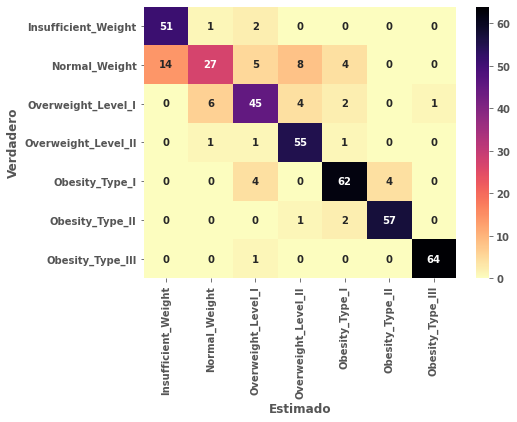

In [64]:
GraficaCM(y_test, y_hat_kn, class_dict)

## RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier

params_dict = {'n_estimators':np.arange(100,801,50),
            'max_depth': np.arange(3,16),
            'max_features': ['sqrt'],
            'class_weight':['balanced']
            }

model = RandomForestClassifier()


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

195

In [66]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=10,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'n_estimators': 250,
 'max_features': 'sqrt',
 'max_depth': 13,
 'class_weight': 'balanced'}

In [67]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [68]:
params_dict = {'n_estimators':np.arange(200,301,25),
            'max_depth': np.arange(10,14),
            'max_features': ['sqrt'],
            'class_weight':['balanced']
            }


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

20

In [69]:
#GridSearch:
model = RandomForestClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': array([10, 11, 12, 13]),
                         'max_features': ['sqrt'],
                         'n_estimators': array([200, 225, 250, 275, 300])},
             scoring='f1_macro', verbose=2)

In [70]:
grid_cv.best_params_, grid_cv.best_score_

({'class_weight': 'balanced',
  'max_depth': 13,
  'max_features': 'sqrt',
  'n_estimators': 275},
 0.863987437503362)

In [71]:
rf_model = RandomForestClassifier(**grid_cv.best_params_)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       max_features='sqrt', n_estimators=275)

In [72]:
y_hat_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_hat_rf, average='macro')
f1_rf

0.838338761452038

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.92        54
      Normal_Weight       0.70      0.66      0.68        58
 Overweight_Level_I       0.67      0.71      0.69        58
Overweight_Level_II       0.80      0.88      0.84        58
     Obesity_Type_I       0.81      0.80      0.81        70
    Obesity_Type_II       0.95      0.95      0.95        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.84       423
          macro avg       0.84      0.84      0.84       423
       weighted avg       0.84      0.84      0.84       423



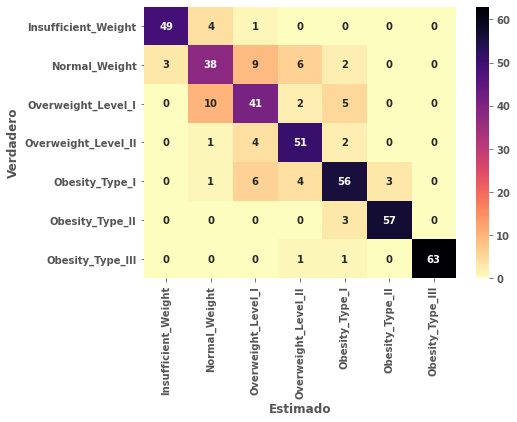

In [73]:
GraficaCM(y_test, y_hat_rf, class_dict)

## XGBoosting

In [74]:
from xgboost import XGBClassifier


params_dict = {'n_estimators':np.arange(100,801,50),
            'max_depth': np.arange(3,16),
            'colsample_bytree': np.arange(0.1,1.1,.1)
            }


model = XGBClassifier()


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

1950

In [75]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=10,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

[12:46:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 150, 'max_depth': 13, 'colsample_bytree': 0.6}

In [76]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [77]:
params_dict = {'n_estimators':np.arange(100,201,25),
            'max_depth': np.arange(12,15),
            'colsample_bytree': np.arange(0.55,0.71,.05)
               
            }

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

60

In [78]:
#GridSearch:
model = XGBClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[12:51:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [79]:
grid_cv.best_params_, grid_cv.best_score_

({'colsample_bytree': 0.6000000000000001,
  'max_depth': 12,
  'n_estimators': 175},
 0.8572471088608898)

In [80]:
xgb_model = XGBClassifier(**grid_cv.best_params_)
xgb_model.fit(X_train, y_train)

[12:51:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6000000000000001,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=175, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
y_hat_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_hat_xgb, average='macro')
f1_xgb

0.8477736166345787

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.91      0.89        54
      Normal_Weight       0.74      0.74      0.74        58
 Overweight_Level_I       0.71      0.79      0.75        58
Overweight_Level_II       0.81      0.76      0.79        58
     Obesity_Type_I       0.84      0.81      0.83        70
    Obesity_Type_II       0.97      0.95      0.96        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.85       423
          macro avg       0.85      0.85      0.85       423
       weighted avg       0.85      0.85      0.85       423



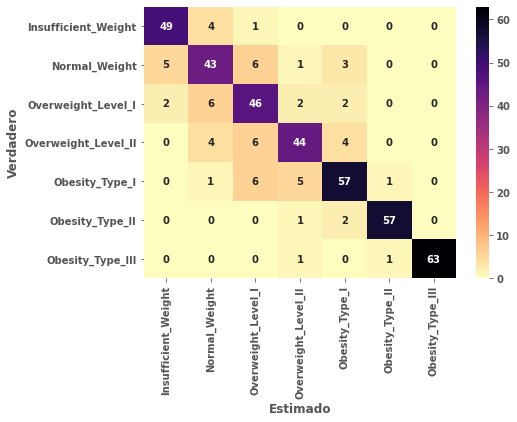

In [82]:
GraficaCM(y_test, y_hat_xgb, class_dict)

## Resultados

In [83]:
#Valores estimados:
y_hat_log = lgr_model.predict(X_test)
y_hat_rf = rf_model.predict(X_test)
y_hat_svm = svm_model.predict(X_test)
y_hat_kn = kn_model.predict(X_test)
y_hat_dt = dt_model.predict(X_test)
y_hat_xgb = xgb_model.predict(X_test)

In [88]:
from sklearn.metrics import precision_score, f1_score, recall_score

#Precision:
from sklearn.metrics import precision_score, f1_score, recall_score
lg_pre = precision_score(y_test, y_hat_log, average='macro')
rf_pre = precision_score(y_test, y_hat_rf, average='macro')
svm_pre = precision_score(y_test, y_hat_svm, average='macro')
dt_pre = precision_score(y_test, y_hat_dt, average='macro')
kn_pre = precision_score(y_test, y_hat_kn, average='macro')
xgb_pre = precision_score(y_test, y_hat_xgb, average='macro')

#F1:
lg_f1 = f1_score(y_test, y_hat_log, average='macro')
rf_f1 = f1_score(y_test, y_hat_rf, average='macro')
svm_f1 = f1_score(y_test, y_hat_svm, average='macro')
dt_f1 = f1_score(y_test, y_hat_dt, average='macro')
kn_f1 = f1_score(y_test, y_hat_kn, average='macro')
xgb_f1 = f1_score(y_test, y_hat_xgb, average='macro')

#Sensibilidad:
lg_re = recall_score(y_test, y_hat_log, average='macro')
rf_re = recall_score(y_test, y_hat_rf, average='macro')
svm_re = recall_score(y_test, y_hat_svm, average='macro')
dt_re = recall_score(y_test, y_hat_dt, average='macro')
kn_re = recall_score(y_test, y_hat_kn, average='macro')
xgb_re = recall_score(y_test, y_hat_xgb, average='macro')

In [89]:
df_results = pd.DataFrame({'Modelo': ['RandomForest', 'LogisticRegression', 'SVM', 'DecisionTree', 
                                     'XGBClassifier', 'KNeighbors'],
                          'Precision': [rf_pre, lg_pre, svm_pre,
                                           dt_pre, xgb_pre, kn_pre],
                          'Recall': [rf_re, lg_re, svm_re,
                                           dt_re, xgb_re, kn_re],
                          'f1_score': [rf_f1, lg_f1, svm_f1,
                                           dt_f1, xgb_f1, kn_f1]})
df_results

,Modelo,Precision,Recall,f1_score
0,RandomForest,0.839516,0.838288,0.838339
1,LogisticRegression,0.944740,0.944807,0.944360
2,SVM,0.913786,0.913671,0.913541
3,DecisionTree,0.752869,0.734581,0.739200
4,XGBClassifier,0.849032,0.847718,0.847774
5,KNeighbors,0.847573,0.850633,0.841838


In [93]:
df_results.sort_values(['f1_score', 'Recall'], ascending=False, ignore_index=True)

,Modelo,Precision,Recall,f1_score
0,LogisticRegression,0.944740,0.944807,0.944360
1,SVM,0.913786,0.913671,0.913541
2,XGBClassifier,0.849032,0.847718,0.847774
3,KNeighbors,0.847573,0.850633,0.841838
4,RandomForest,0.839516,0.838288,0.838339
5,DecisionTree,0.752869,0.734581,0.739200
